In [ ]:
#CNN: Convolutional Neural Network
#Has 4 Layers:
#Convolutional layer-Kernel matrix is used to extract features
#relu layer
#pooling layer
#fully connected layer
#used to extract features from images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
np.random.seed(0)

In [ ]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


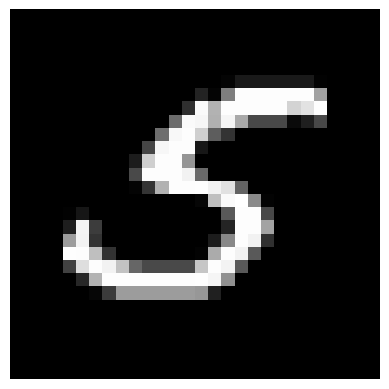

In [ ]:
plt.imshow(x_train[y_train==5][30],cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
for i in range(0,10):
  print(i,';',len(x_train[y_train==i]))

0 ; 5923
1 ; 6742
2 ; 5958
3 ; 6131
4 ; 5842
5 ; 5421
6 ; 5918
7 ; 6265
8 ; 5851
9 ; 5949


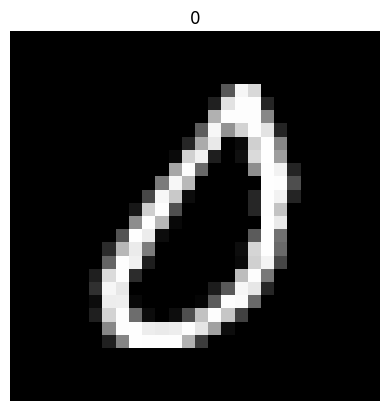

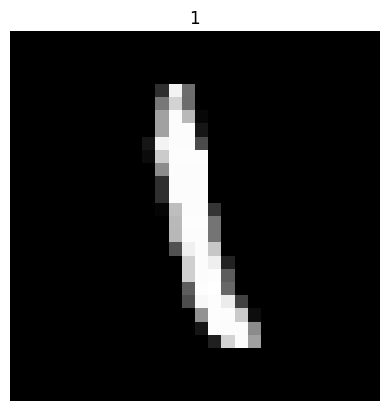

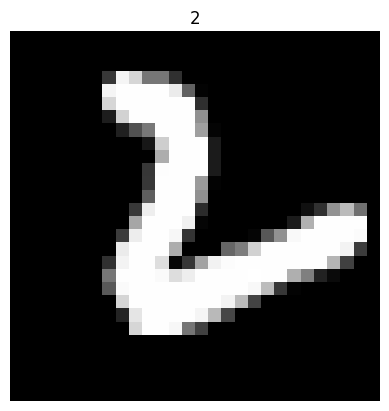

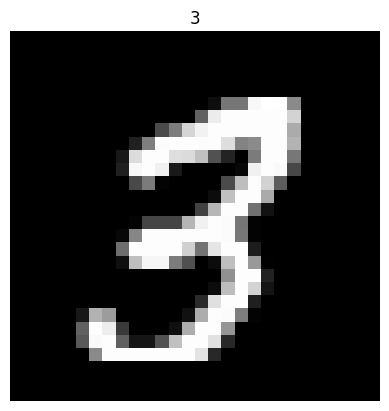

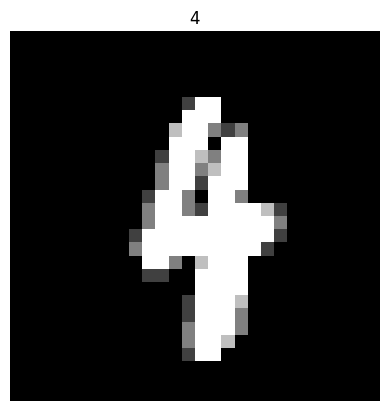

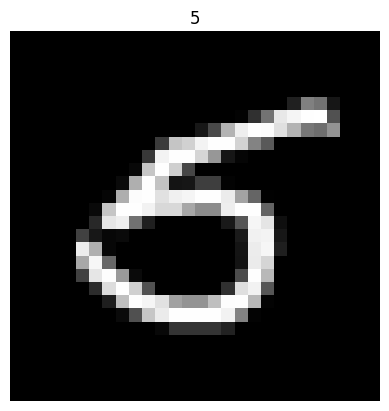

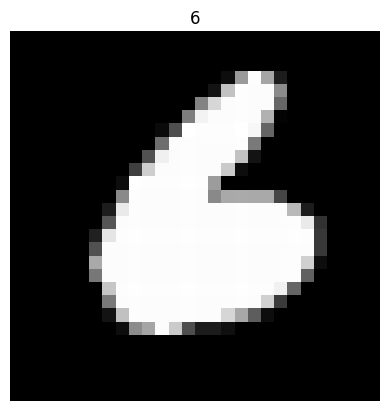

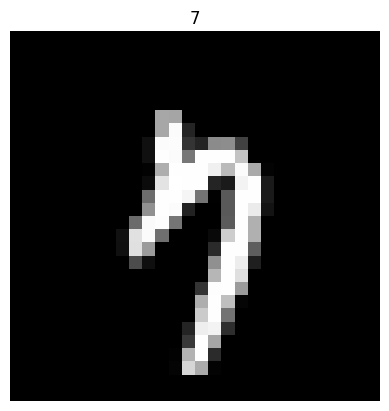

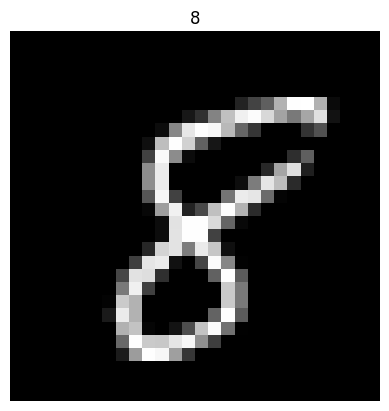

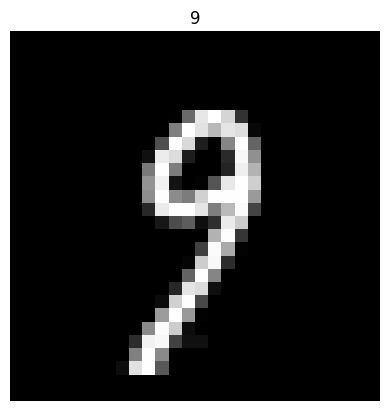

In [ ]:
for i in range(0,10):
  plt.imshow(x_train[y_train==i][np.random.randint(0,5400)],cmap='gray')
  plt.title(str(i))
  plt.axis('off')
  plt.show()

Number of samples :  [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


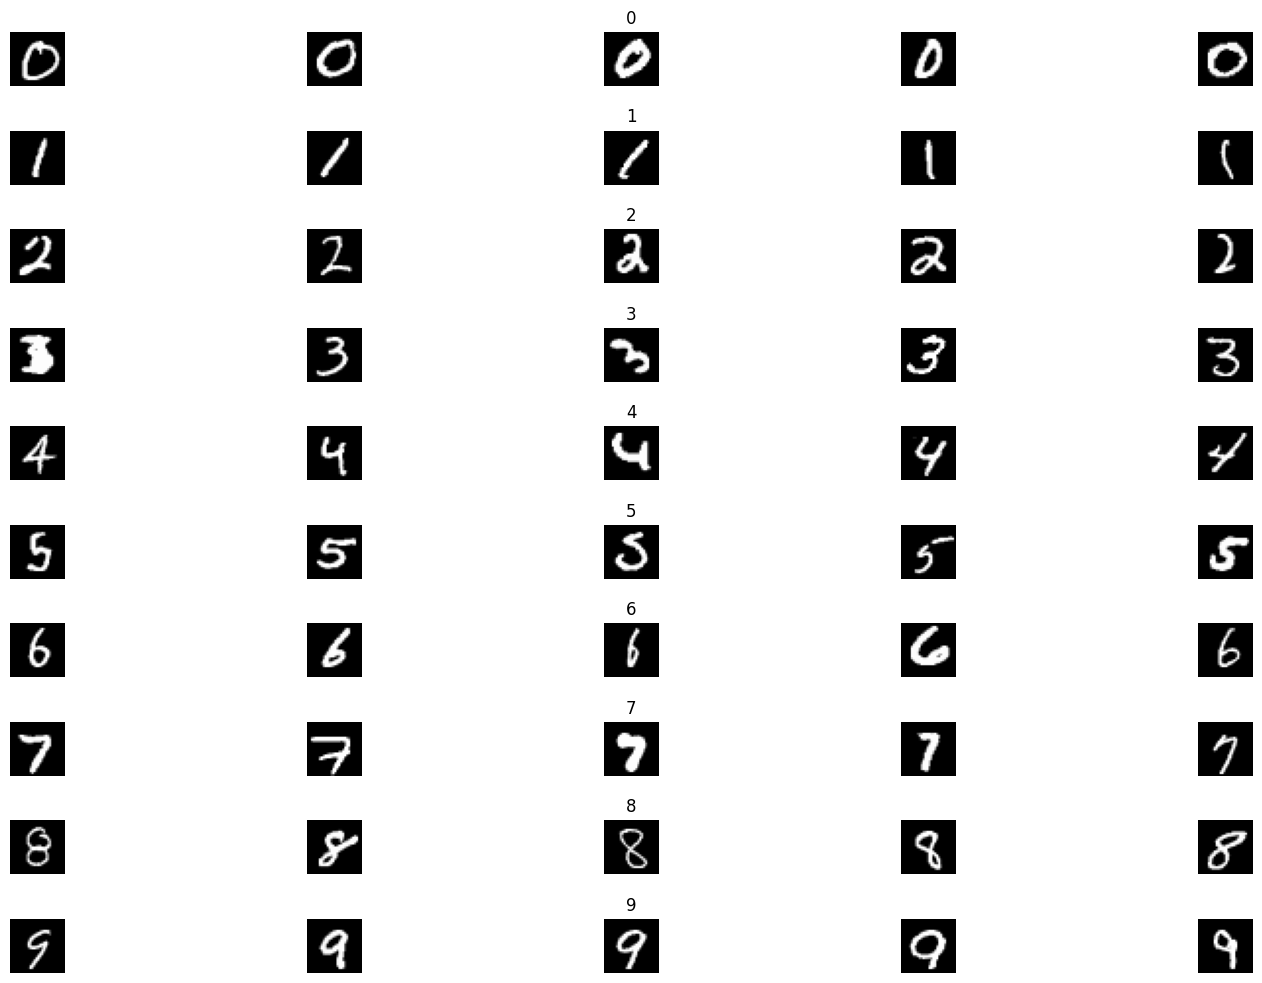

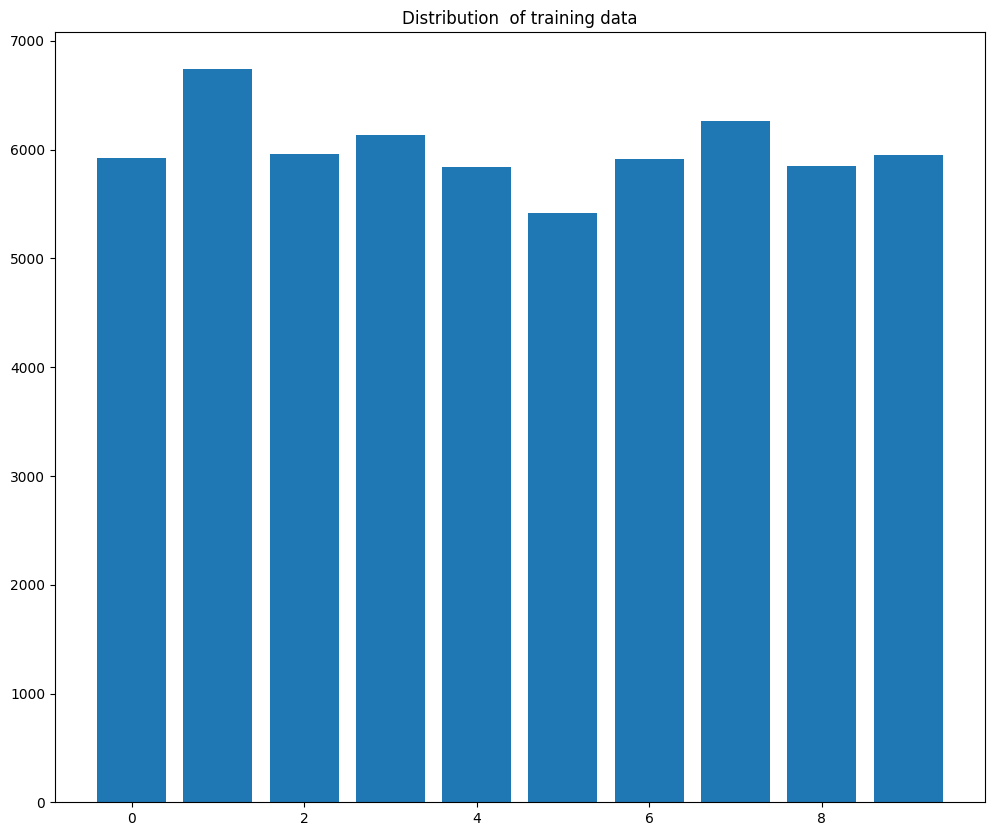

In [ ]:
num_of_samples = []
fig, axs = plt.subplots(nrows = 10, ncols = 5, figsize=(15,10))
fig.tight_layout()#otherwise title is on image
for i in range(5):
  for j in range(10):
    axs[j][i].imshow(x_train[y_train==j][random.randint(0,(len(x_train[y_train==j])-1))],cmap='gray')
    axs[j][i].axis('off')

    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_train[y_train==j]))
print('Number of samples : ',num_of_samples)
plt.figure(figsize=(12,10))
plt.bar(range(0,10),num_of_samples)
plt.title("Distribution  of training data")
plt.show()

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


In [ ]:
x_train=x_train/255
x_test = x_test/255

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
def Lenet_Model():
  model = Sequential()
  #Convolutional layer and relu layer
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  #max pooling layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  #Flatten
  model.add(Flatten())
  #hideen layers
  model.add(Dense(200,activation='relu'))
  model.add(Dense(100,activation='relu'))
  #Output Layer
  model.add(Dense(10,activation='softmax'))

  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = Lenet_Model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 15)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 200)               7

In [ ]:
h = model.fit(x_train,y_train,validation_split=0.2,epochs=10,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2081 - accuracy: 0.9381 - val_loss: 0.1624 - val_accuracy: 0.9616
Epoch 2/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.1335 - accuracy: 0.9632 - val_loss: 0.1390 - val_accuracy: 0.9658
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1251 - accuracy: 0.9663 - val_loss: 0.1454 - val_accuracy: 0.9622
Epoch 4/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1160 - accuracy: 0.9690 - val_loss: 0.1193 - val_accuracy: 0.9730
Epoch 5/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1118 - accuracy: 0.9719 - val_loss: 0.1295 - val_accuracy: 0.9709
Epoch 6/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1058 - accuracy: 0.9735 - val_loss: 0.1180 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1114 - accuracy: 0.9721 - val_loss: 0.1006 -

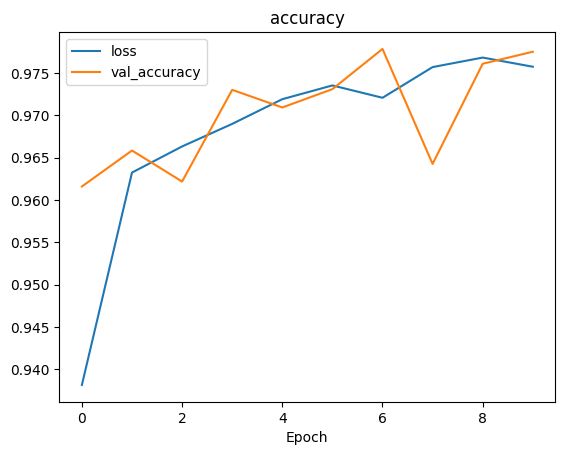

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['loss','val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.show()

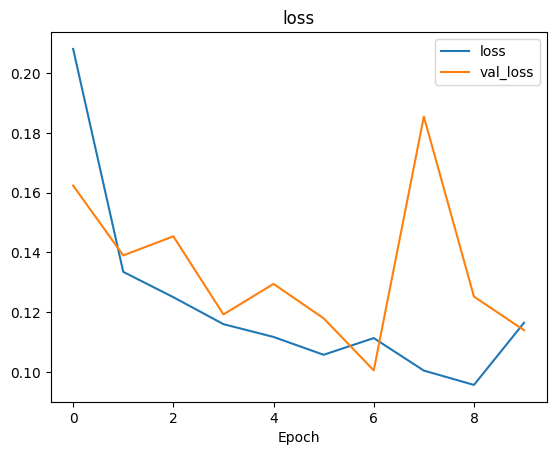

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
from google.colab import files
c = files.upload()

Saving 3.png to 3.png


In [ ]:
d = list(c.keys())[0]
print(d)

3.png


In [ ]:
import cv2
a = np.fromstring(c[d],np.uint8)
print(a)

[137  80  78 ...  66  96 130]


<ipython-input-26-32abbca8f66d>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a = np.fromstring(c[d],np.uint8)


In [ ]:
b = cv2.imdecode(a,cv2.IMREAD_COLOR)

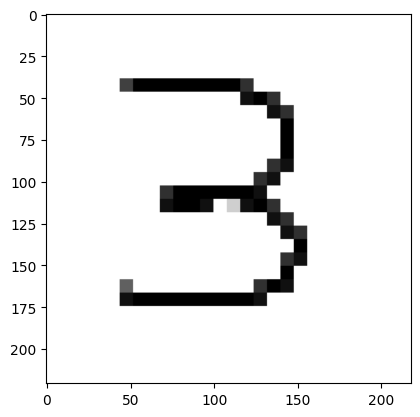

In [ ]:
plt.imshow(b,cmap='gray')
plt.show()

In [ ]:
b.shape

(221, 218, 3)

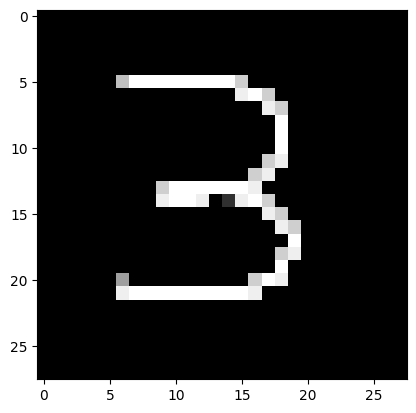

In [ ]:
b = cv2.resize(b,(28,28))
b = cv2.cvtColor(b,cv2.COLOR_BGR2GRAY)
b = cv2.bitwise_not(b)#in training set image background is black but here its white...sooooooooo.......you know....
plt.imshow(b,cmap='gray')
plt.show()

In [ ]:
b = b/255
b = b.reshape(1,28,28,1)

In [ ]:

pred = model.predict(b)

1/1 [==============================] - 0s 120ms/step


In [ ]:
pred

array([[0.05573756, 0.227224  , 0.09958956, 0.02852755, 0.06829417,
        0.02950643, 0.07755909, 0.05363953, 0.28373888, 0.07618334]],
      dtype=float32)

In [ ]:
p = np.argmax(pred,axis=1)

In [ ]:
p

array([8])